In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [6]:
s = lambda t : np.exp(1j*t/(2*np.pi))
t0 = np.arange(0,1,0.01)
sampled = np.array([t0,s(t0)])
# plt.plot(sampled)
plt.plot(t0,np.abs(s(t0)))
plt.plot(t0,np.angle(s(t0)))
plt.show()

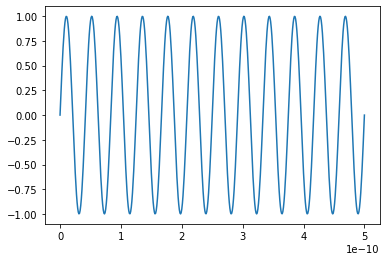

In [7]:
# Oscillator

f_HF = 24e9
# f_HF = 1
t0 = np.arange(0,5e-10,1e-12)
osc = lambda t : np.sin(2*np.pi*t*f_HF) 
# print(t0)
plt.plot(t0,osc(t0))

In [8]:
# Chirp

t_chirp = 50e-6
f_shift = 50e6
phase = lambda t : np.exp(1j*2*np.pi*t*(t/t_chirp)*f_shift) 
chirp = lambda t : (np.heaviside(t,1)-np.heaviside(t-t_chirp,1))*osc(t)
t0 = np.arange(-1e-10,5e-10,1e-12)
plt.plot(t0,np.real(phase(t0)))
plt.plot(t0,chirp(t0)*phase(t0))

In [9]:
c_light = 3*1e8
distance = 10 # meteres
t_delay = distance / c_light
print(t_delay)
phi = 0.9
atten = 3 #dB
scale = np.exp(1j*phi)/np.power(10,(atten/20))
print(scale)
reflected = lambda t : chirp(t)*phase(t)*scale
delayed = lambda t : reflected(t-t_delay)
t0 = np.arange(3.4e-8,3.5e-8,1e-12)
# t0 = np.arange(0,5e-8,1e-12)
plt.plot(t0,chirp(t0)*phase(t0))
plt.plot(t0,delayed(t0))

3.3333333333333334e-08
(0.44006615656837456+0.5545529834654315j)


ValueError: x and y must have same first dimension, but have shapes (1001,) and (100,)

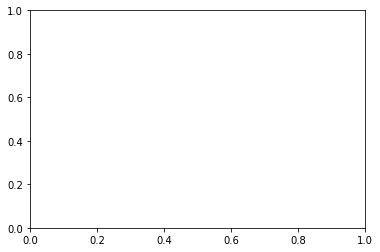

In [19]:
# fig,ax = plt.subplots()
t0 = np.arange(3.4e-8,3.5e-8,1e-12)
# fft_received = np.fft.fft(reflected(t0))
fft = np.fft.fft(delayed(t0))
freqs = np.fft.fftfreq(100)
# plt.xlim(0,1e7)
plt.plot(fft,freqs)